<h1><center>Use of Artificial Intelligence </center></h1>
<h2><center>in PharmacoVigilance for Social Networking sites</center></h2>

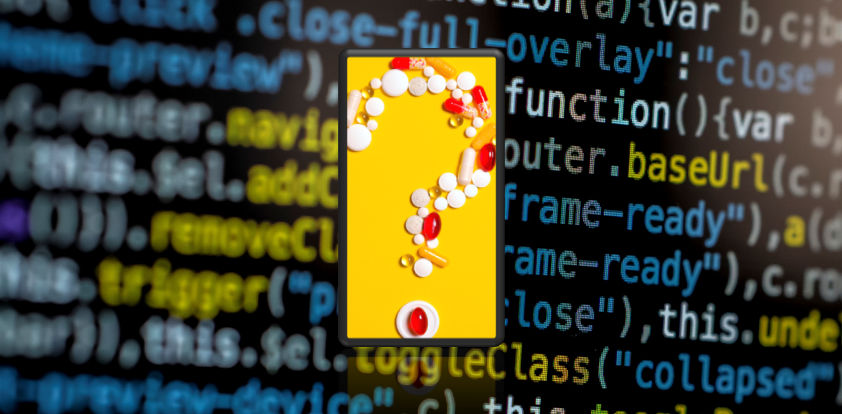
*- Photo from Pexels*

# Import All the required Libraries 

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
from textblob import TextBlob
from textblob import Word

import re
import string

In [3]:
import spacy
import en_core_med7_lg
import en_core_web_sm

med7 = en_core_med7_lg.load()
nlp = en_core_web_sm.load()

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
import tweepy

# Load the data

## From Twitter

In [7]:
consumer_key = 'gBBs2fLujV5jTW4jFxSwH51vd'
consumer_secret = 'R7vZRQi1VEGivnG0gx0EpInqEx7HrmpoPoA9eScL1D21fZgcOX'
access_token = '80056443-tyHxUS5PLHHdDP9yBCjpH4cYn3SKzisJIUMY1ZGQf'
access_token_secret = 'GIB87E38jkhtuG4Po3XTncsU0IaV8K5zf0K9SLoYO1jzH'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #Interacting with twitter's API
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API (auth) #creating the API object


#Extracting Tweets
results = []
for tweet in tweepy.Cursor (api.search, q = 'plaquenil', lang = "en").items(5): 
    results.append(tweet)
    
print (type(results))
print (len(results))

<class 'list'>
5


In [8]:
results

[Status(_api=<tweepy.api.API object at 0x000001F43A4519C8>, _json={'created_at': 'Mon Aug 17 06:04:02 +0000 2020', 'id': 1295239945435533312, 'id_str': '1295239945435533312', 'text': '@sharonstone Was she on plaquenil? Just curious.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sharonstone', 'name': 'Sharon Stone', 'id': 1949906586, 'id_str': '1949906586', 'indices': [0, 12]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1294803570550874112, 'in_reply_to_status_id_str': '1294803570550874112', 'in_reply_to_user_id': 1949906586, 'in_reply_to_user_id_str': '1949906586', 'in_reply_to_screen_name': 'sharonstone', 'user': {'id': 4751087630, 'id_str': '4751087630', 'name': 'Zub', 'screen_name': 'flawedgenius777', 'location': 'Las Vegas, NV', 'description': 'Do No Harm. Live, Love, La

In [9]:
#Store tweets data in a dataframe

def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set
data_set = tweets_df(results)


# Remove tweets with duplicate text

text = data_set["text"]

for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    data_set.set_value(i, 'text2', txt)
    
data_set.drop_duplicates('text2', inplace=True)
data_set.reset_index(drop = True, inplace=True)
data_set.drop('text', axis = 1, inplace = True)
data_set.rename(columns={'text2': 'text'}, inplace=True)

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [10]:
data_set.head()

,id,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,text
0,1295239945435533312,2020-08-17 06:04:02,0,flawedgenius777,76,"Las Vegas, NV",[],@sharonstone Was she on plaquenil? Just curious.
1,1295212208570470400,2020-08-17 04:13:49,0,TenshiAngelina,132,México,[],My doctor just told me that the cases of peopl...
2,1295209846346788864,2020-08-17 04:04:25,0,nurse_ruthie,33,,[],Please pray for me that I can convince patient...
3,1295207817830371328,2020-08-17 03:56:22,0,jgonzales19701,48,,[],@eugenegu I took plaquenil and ivermectin and ...
4,1295195915288903680,2020-08-17 03:09:04,69938,CKnitkindness,1088,,"[{'text': 'COVID19', 'indices': [89, 97]}]",RT @EdselSalvana: Please don't take hydroxychl...


In [12]:
data_set.to_csv('tweet_extract_1.csv')

**From Where:**
Twitter allows the access of tweets from different users or hastags to it's developer community through their site https://developer.twitter.com/<br>
    We are planning to use this facility from Tweeter to extract data related to a given Drug
    
For this project, we are utilising the already extracted data for the Drugs like "**Adderall**" etc which goes by the generic name of "**amphetamine and dextroamphetamine**"



## From Already downloaded data

In [74]:
data = pd.read_csv("AHDH.csv", sep=",")
data.head()

,Unnamed: 0,Brand Name,ID_Drug,Generic Name,Review,Rating,Unnamed: 6
0,1,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a...",10,NaN
1,2,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st...",9,NaN
2,3,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did...",7,NaN
3,4,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and...",7,NaN
4,5,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So...",10,NaN


In [75]:
data.shape

(1231, 7)

# Data cleanup

##### Remove unwanted columns

In [76]:
data.drop(['Unnamed: 6', 'Unnamed: 0', 'Rating'],axis=1, inplace=True)
data.head()

,Brand Name,ID_Drug,Generic Name,Review
0,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
1,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st..."
2,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did..."
3,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and..."
4,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."


In [63]:
data.shape

(1231, 4)

##### Check for Null Data

In [8]:
data['Review'].isnull().sum()

0

In [9]:
# new_data = data[data['Review'].notna()]
# new_data.shape

In [10]:
# data = new_data
# data['Review'].isnull().sum()

##### Check of spaces in column headline - using enumerate

In [11]:
spaces = []
for i, x in enumerate(data['Review']):
    if type(x) == str:
        if x.isspace():
            spaces.append(i)
        
print(len(spaces), 'spaces in index: ', spaces)

0 spaces in index:  []


In [12]:
data.shape

(1231, 4)

In [77]:
data.head()

,Brand Name,ID_Drug,Generic Name,Review
0,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
1,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st..."
2,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did..."
3,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and..."
4,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."


##### Remove tweets with duplicate text

In [14]:
data.drop_duplicates('Review', inplace=True)
data.reset_index(drop = True, inplace=True)

# Data Visualization

In [15]:
data.shape

(1231, 4)

In [16]:
# Count each Brand occurance in the data
brand_data = data['Brand Name'].value_counts()

In [17]:
brand_data.values

array([399, 198, 190, 152, 116,  55,  46,  44,  31], dtype=int64)

In [18]:
brand_data.index

Index(['Vyvanse', 'Strattera', 'Concerta', 'Adderall', 'Adderall XR ',
       'Ritalin', 'Dexedrine', 'Daytrana', 'Metadate CD'],
      dtype='object')

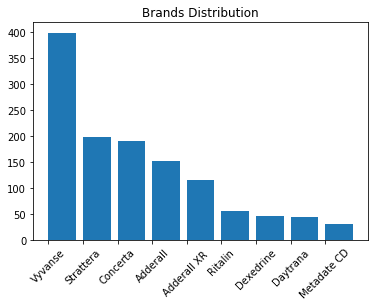

<Figure size 2400x1760 with 0 Axes>

In [19]:
#Visualizing the spread of Brands
plt.bar(brand_data.index, brand_data.values, align='edge')
plt.xticks(rotation=45)
plt.title('Brands Distribution')
plt.figure(figsize=(30,22), dpi=80)
plt.show()

[Text(0, 0, 'Vyvanse'),
 Text(0, 0, 'Strattera'),
 Text(0, 0, 'Concerta'),
 Text(0, 0, 'Adderall'),
 Text(0, 0, 'Adderall XR\xa0'),
 Text(0, 0, 'Ritalin'),
 Text(0, 0, 'Dexedrine'),
 Text(0, 0, 'Daytrana'),
 Text(0, 0, 'Metadate CD')]

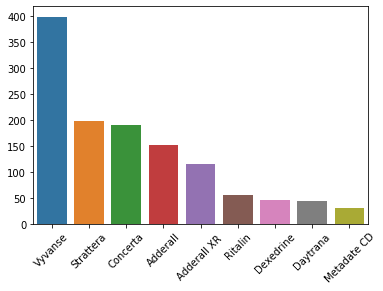

In [20]:
chart = sns.barplot(x=brand_data.index, y=brand_data.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# Exploratory Data Analysis

**Expand the Contraction words**

Contractions are the short hand versions of words like "don’t" for "do not" and "how’ll" for "how will". 
These are commonly used in casual chatting, including posts in social networking sites, to reduce the 
writing time of words. 

For better analysis of the reveiws, we need to expand these contractions

In [78]:
#Let's create contraction dictionary

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [79]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [80]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

above code logic for contraction is referred to from the blog site:<br>
source: https://www.analyticsvidhya.com/blog/author/abhishek-shrm/ 

In [81]:
sample_text = '''This ain't as we couldn't reach'''
expand_contractions(sample_text)

'This are not as we could not reach'

In [82]:
# Modify the review by Expanding Contractions
data['Rev_mod']=data['Review'].apply(lambda x:expand_contractions(x))

In [112]:
data['Review'][0:5]

0    "Hi everyone. I am 25 years old married with a...
1    "I'm a 31yr old female, 5'4, 115lbs. I was 1st...
2    "This drug was prescribed to after ritilin did...
3    "My face breaks out in itchy blotchy spots and...
4    "Adderall has improved my life drastically! So...
Name: Review, dtype: object

In [83]:
data['Rev_mod'][0:5]

0    "Hi everyone. I am 25 years old married with a...
1    "I am a 31yr old female, 5'4, 115lbs. I was 1s...
2    "This drug was prescribed to after ritilin did...
3    "My face breaks out in itchy blotchy spots and...
4    "Adderall has improved my life drastically! So...
Name: Rev_mod, dtype: object

**Convert all text to Lower case**

In general Python is case sensitive and all NLP models follow this principle. Hence any text analysis package would treat words like 'Student' and 'student' differently. 

Since there is no difference in the meaning of both the words in a statement, we can convert all the texts to lower case  

In [84]:
data['Rev_mod'] = [w.lower() for w in data['Rev_mod']]

In [85]:
data['Rev_mod'][0:5]

0    "hi everyone. i am 25 years old married with a...
1    "i am a 31yr old female, 5'4, 115lbs. i was 1s...
2    "this drug was prescribed to after ritilin did...
3    "my face breaks out in itchy blotchy spots and...
4    "adderall has improved my life drastically! so...
Name: Rev_mod, dtype: object

**Remove Punctuations**

Punctuations are the marks in English like commas, hyphens, full stops, etc.
These add to the volumne of the text for processing, even though not used in the Text analysis exercise

In [86]:
data['Rev_mod']=data['Rev_mod'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [87]:
data['Rev_mod'][0:5]

0    hi everyone i am 25 years old married with a 6...
1    i am a 31yr old female 54 115lbs i was 1st pre...
2    this drug was prescribed to after ritilin did ...
3    my face breaks out in itchy blotchy spots and ...
4    adderall has improved my life drastically so d...
Name: Rev_mod, dtype: object

**Lemmatization with stopwords removal**

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. <br>
-Wikipedia

Stopwords are commonly used word in a sentence (such as “the”, “a”, “an”, “in”). These are useful in a conversation, but adds no value to the Text analysis. These would also to take up space in the database, or taking up valuable processing time. H=We should hence remove these stopwords from processing

In [88]:
data['Rev_mod']=data['Rev_mod'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) 
                                                          if (token.is_stop==False)]))

In [113]:
data[['Review', 'Rev_mod']].head()

,Review,Rev_mod
0,"""Hi everyone. I am 25 years old married with a...",hi 25 year old marry 6 month old son diagnose ...
1,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st...",31yr old female 54 115lbs 1st prescribe addera...
2,"""This drug was prescribed to after ritilin did...",drug prescribe ritilin work medication help ad...
3,"""My face breaks out in itchy blotchy spots and...",face break itchy blotchy spot sleep
4,"""Adderall has improved my life drastically! So...",adderall improve life drastically drastically ...


# Sentiment Analysis

Next step is to identify reviews that may have any Adverse Events reported. This is the very core of this project. These are typically any side effects that the customer is not happy with<br>
  We may use Sentiment Analysis algorithm to identify such reporting, which can be further used to extract Event related information to be used for reporting to regulatory authorities 

**What is Sentiment Analysis:**

Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information
    A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion is *positive, negative, or neutral*. For instance, at emotional states such as "angry", "sad", and "happy".
    
https://en.wikipedia.org/wiki/Sentiment_analysis

**Sentiment Analysis with TextBlob:**

TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.
    The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

https://textblob.readthedocs.io/en/dev/quickstart.html

##### Let's check the Sentiment Polarity of the reviews & Subjectivity of respective Sentiments

In [90]:
reviews = data["Rev_mod"]

for i in range(0,len(reviews)):
    reviewsBlob = TextBlob(reviews[i])
    sentiment = reviewsBlob.sentiment.polarity
    subjectivity = reviewsBlob.sentiment.subjectivity
    data.set_value(i, 'Sentiment', sentiment)
    if sentiment < -0.00:
        SentimentClass = 'Negative'
        data.set_value(i, 'SentimentClass', SentimentClass )
    elif sentiment > 0.15:
        SentimentClass = 'Positive'
        data.set_value(i, 'SentimentClass', SentimentClass )
    else:
        SentimentClass = 'Neutral'
        data.set_value(i, 'SentimentClass', SentimentClass )
        
    data.set_value(i, 'Subjectivity', subjectivity)
    if subjectivity < 0.45:
        SubjecivityClass = 'Objective'
        data.set_value(i, 'SubjecivityClass', SubjecivityClass )
    elif sentiment > 0.55:
        SubjecivityClass = 'Subjective'
        data.set_value(i, 'SubjecivityClass', SubjecivityClass )
    else:
        SubjecivityClass = 'Neutral'
        data.set_value(i, 'SubjecivityClass', SubjecivityClass )
        
data.head()

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site

,Brand Name,ID_Drug,Generic Name,Review,Rev_mod,Sentiment,SentimentClass,Subjectivity,SubjecivityClass
0,Adderall,1,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a...",hi 25 year old marry 6 month old son diagnose ...,-0.200000,Negative,0.530303,Neutral
1,Adderall,1,amphetamine and dextroamphetamine,"""I'm a 31yr old female, 5'4, 115lbs. I was 1st...",31yr old female 54 115lbs 1st prescribe addera...,0.071429,Neutral,0.357143,Objective
2,Adderall,1,amphetamine and dextroamphetamine,"""This drug was prescribed to after ritilin did...",drug prescribe ritilin work medication help ad...,0.443182,Positive,0.702273,Neutral
3,Adderall,1,amphetamine and dextroamphetamine,"""My face breaks out in itchy blotchy spots and...",face break itchy blotchy spot sleep,0.000000,Neutral,0.000000,Objective
4,Adderall,1,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So...",adderall improve life drastically drastically ...,-0.068750,Negative,0.499851,Neutral


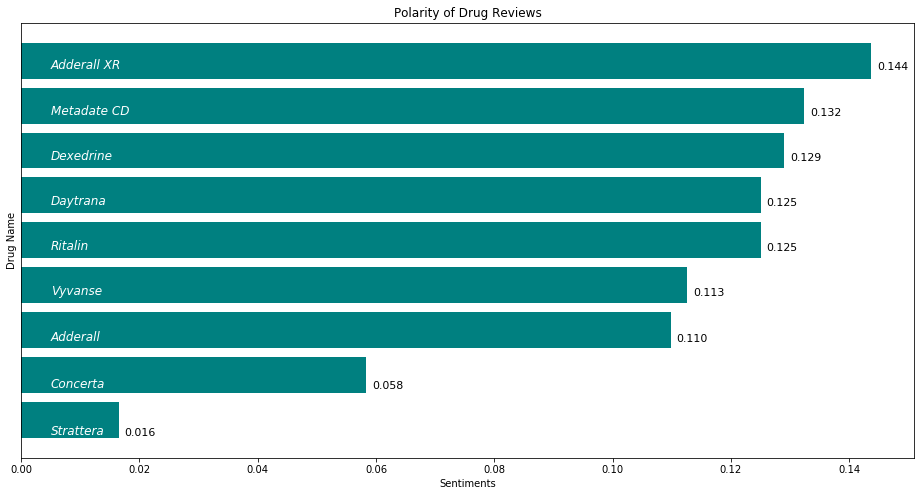

In [111]:
product_polarity_sorted=pd.DataFrame(data.groupby('Brand Name')['Sentiment'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Sentiments')
plt.ylabel('Drug Name')
plt.title('Polarity of Drug Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['Sentiment'],color='teal',)

# Writing Drug names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),verticalalignment='bottom', horizontalalignment='left',
           fontsize=12,color='white',style='italic')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['Sentiment']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='bottom',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

### From the graph above, it is evident that Adderall XR has the highest positivity in the review and Strattera has loweest positivity 

In [101]:
# Writer the file for further analysis in Tableau
data.to_csv('Review_with_Sentiment.csv', index=False)

In [91]:
data['SentimentClass'].value_counts()

Neutral     447
Positive    438
Negative    346
Name: SentimentClass, dtype: int64

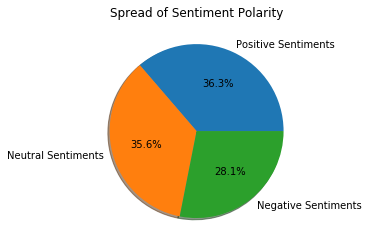

In [92]:
#Visualizing the spread of Sentiments
review_data = data['SentimentClass'].value_counts()
plt.pie(review_data, autopct='%1.1f%%', shadow=True, 
        labels=['Positive Sentiments','Neutral Sentiments', 'Negative Sentiments'])
plt.title('Spread of Sentiment Polarity');
plt.show()

In [93]:
data['SubjecivityClass'].value_counts()

Neutral       861
Objective     328
Subjective     42
Name: SubjecivityClass, dtype: int64

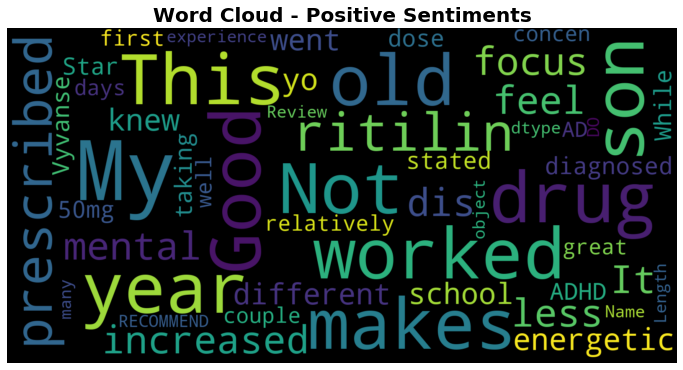

In [94]:
#Word cloud of Positive Sentiments
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(data[data['SentimentClass']=='Positive']['Review']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Positive Sentiments',fontsize=20,fontweight='bold')
plt.show()

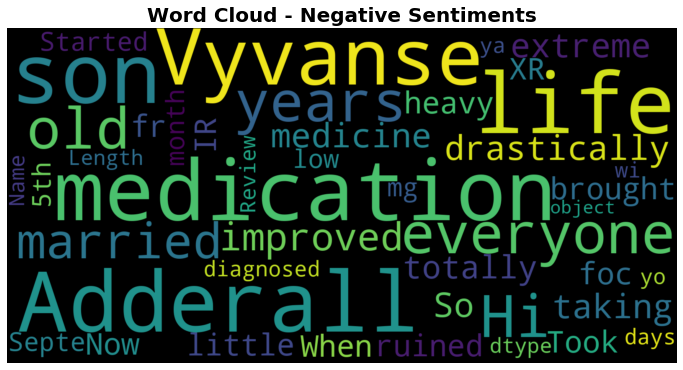

In [95]:
#Word cloud of Negative Sentiments
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(data[data['SentimentClass']=='Negative']['Review']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Negative Sentiments',fontsize=20,fontweight='bold')
plt.show()

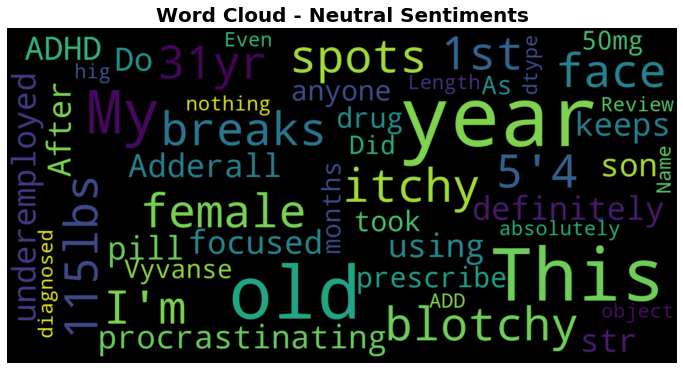

In [96]:
#Word cloud of Neutral Sentiments
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(data[data['SentimentClass']=='Neutral']['Review']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Neutral Sentiments',fontsize=20,fontweight='bold')
plt.show()

# Now select all the Reviews with Negative Polarity for further processing

In [97]:
adr_data = data[data['SentimentClass']=='Negative']
adr_data = adr_data[['Brand Name', 'Generic Name', 'Review']]
adr_data.head()

,Brand Name,Generic Name,Review
0,Adderall,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
4,Adderall,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."
6,Adderall,amphetamine and dextroamphetamine,"""I do not like taking medicine but had extreme..."
9,Adderall,amphetamine and dextroamphetamine,"""Adderall has totally brought my life into foc..."
13,Adderall,amphetamine and dextroamphetamine,"""Took XR but IR is a little heavy for me. Now ..."


In [98]:
adr_data.reset_index(inplace = True, drop = True) 
adr_data.head()

,Brand Name,Generic Name,Review
0,Adderall,amphetamine and dextroamphetamine,"""Hi everyone. I am 25 years old married with a..."
1,Adderall,amphetamine and dextroamphetamine,"""Adderall has improved my life drastically! So..."
2,Adderall,amphetamine and dextroamphetamine,"""I do not like taking medicine but had extreme..."
3,Adderall,amphetamine and dextroamphetamine,"""Adderall has totally brought my life into foc..."
4,Adderall,amphetamine and dextroamphetamine,"""Took XR but IR is a little heavy for me. Now ..."


In [99]:
# Count each Brand occurance in the data
adr_brand_data = adr_data['Brand Name'].value_counts()

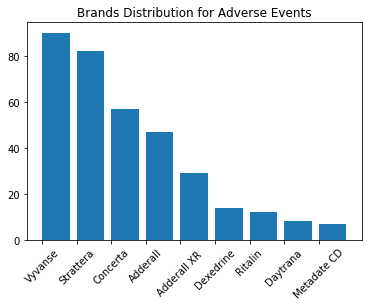

<Figure size 2400x1760 with 0 Axes>

In [100]:
#Visualizing the spread of Brands
plt.bar(adr_brand_data.index, adr_brand_data.values, align='edge')
plt.xticks(rotation=45)
plt.title('Brands Distribution for Adverse Events')
plt.figure(figsize=(30,22), dpi=80)
plt.show()

# Extract Drug information from the Review comments

Drug related information form an important set of data that is required to be sent to regulatory authorities as a part of Adverse Event Reporting (ADR) <br>

We will use the **med7** package for this purpose<br>
This repository is a transferable clinical natural language processing model for electronic health records, compatible with spaCy, for clinical named-entity recognition (NER) tasks. The en_core_med7_lg model is trained on MIMIC-III free-text electronic health records and is able to recognise 7<br>
source: https://github.com/kormilitzin/med7

Various Categories/Lables that this package is able to extract are:
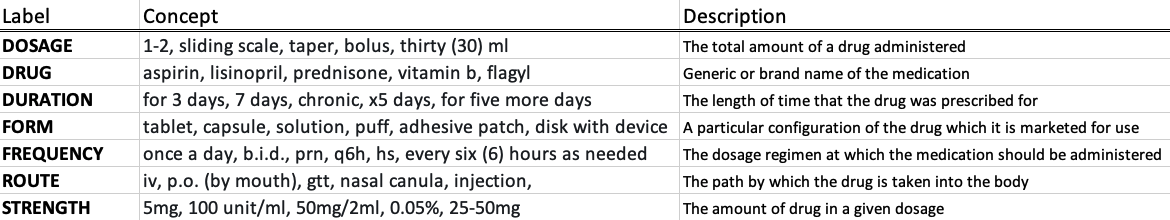

##### Let's see some sample extraction below:

In [42]:
# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

In [43]:
text = '''A patient was prescribed Magnesium hydroxide, aimovig & repatha 400mg/5ml 
suspension PO of total 30ml bid for the next 5 days.'''

doc = med7(text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

In [44]:
drug_detail = [(ent.label_, ent.text) for ent in doc.ents]
drug_detail

[('DRUG', 'Magnesium hydroxide'),
 ('DRUG', 'aimovig'),
 ('DRUG', 'repatha'),
 ('STRENGTH', '400mg/5ml'),
 ('FORM', 'suspension'),
 ('ROUTE', 'PO'),
 ('DOSAGE', '30ml'),
 ('FREQUENCY', 'bid'),
 ('DURATION', 'for the next 5 days')]

In [46]:
adr_data = adr_data.astype('object')
reviews = adr_data['Review']

for i in range(0,len(reviews)):
    doc = med7(reviews[i])
    drug_detail = [(ent.label_, ent.text) for ent in doc.ents]
    adr_data.set_value(i, 'Drug Detail', drug_detail)

C:\Users\197212\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [47]:
adr_data.head()

,Brand Name,Generic Name,Review,Drug Detail
0,Adderall,amphetamine and dextroamphetamine,hi everyone i am 25 years old married with a 6...,"[(DRUG, adderall), (STRENGTH, 30mg), (ROUTE, i..."
1,Adderall,amphetamine and dextroamphetamine,adderall has improved my life drastically so d...,"[(DRUG, adderall)]"
2,Adderall,amphetamine and dextroamphetamine,adderall has totally brought my life into focu...,"[(DRUG, adderall)]"
3,Adderall,amphetamine and dextroamphetamine,i have been taking adderall for two years and ...,"[(DRUG, adderall), (DURATION, for two years), ..."
4,Adderall,amphetamine and dextroamphetamine,when i was diagnosed with adhd in the 3rd grad...,"[(DRUG, adderall), (DRUG, adderall)]"


In [48]:
adr_data['Drug Detail'][25]

[('DRUG', 'adderall'),
 ('DRUG', 'zoloft'),
 ('DRUG', 'adderall'),
 ('DRUG', 'zoloft'),
 ('DRUG', 'adderall')]

In [49]:
type(adr_data)

pandas.core.frame.DataFrame

Plot